In [31]:
## load training and test datasets using torchvision
## define a CNN
## loss func
## train
## test

In [32]:
import torch
import torch.nn as nn
import torchvision                          #torch中用来处理图像的库
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

#设置一些超参
num_epochs = 2        #训练的周期
batch_size = 4      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

In [33]:
import os
os.environ['TORCH_HOME']='D:/dataset/'
#导入训练数据
train_dataset = datasets.MNIST(root='D:/dataset/',                #数据集保存路径
                               train=True,                      #是否作为训练集
                               transform=transforms.ToTensor(), #数据如何处理, 可以自己自定义
                               download=True)                  #路径下没有的话, 可以下载           
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, #分批
                                           batch_size=batch_size,
                                           shuffle=True)          #随机分批
#导入测试数据
test_dataset = datasets.MNIST(root='D:/dataset/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True,)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')

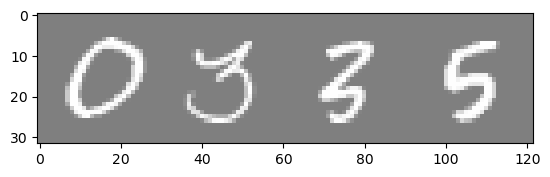

0     3     3     5    


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [35]:
# class MLP(nn.Module):                    
#     def __init__(self, neurons_layer1):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(784, neurons_layer1) # 第一隐藏层神经元数量由参数决定
#         self.relu = nn.ReLU()
#         self.layer2 = nn.Linear(neurons_layer1, 100) # 第二隐藏层神经元数量固定为 100
#         self.layer3 = nn.Linear(100, 10)             # 输出层

#     def forward(self, x):
#         x = x.reshape(-1, 28*28)
#         x = self.layer1(x)
#         x = self.relu(x)
#         x = self.layer2(x)
#         x = self.relu(x)
#         y = self.layer3(x)
#         return y

# # 实例化
# mlp_50_neurons = MLP(100)
# mlp_100_neurons = MLP(200)  #  50 个神经元
# mlp_150_neurons = MLP(300) 
# mlp_200_neurons = MLP(400) 


In [36]:
class MLP(nn.Module):                    
    def __init__(self, neurons_layer2):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(784, 300) # 第一隐藏层神经元数量由参数决定
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(300, neurons_layer2) # 第二隐藏层神经元数量固定为 100
        self.layer3 = nn.Linear(neurons_layer2, 10)             # 输出层

    def forward(self, x):
        x = x.reshape(-1, 28*28)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        y = self.layer3(x)
        return y

# 实例化
mlp_10_neurons = MLP(10)
mlp_20_neurons = MLP(20)  #  50 个神经元
mlp_50_neurons = MLP(50) 
mlp_100_neurons = MLP(100) 
mlp_200_neurons = MLP(200) 
#layer2

In [37]:
# mlp_models = {
#     100: MLP(100),
#     200: MLP(200),
#     300: MLP(300),
#     400: MLP(400)
# }
# #实例化的library

In [38]:
mlp_models = {
    10: MLP(10),
    20: MLP(20),
    50: MLP(50),
    100: MLP(100),
    200: MLP(200)
}

In [39]:
#Define a Loss function and optimizer
loss_func = nn.CrossEntropyLoss()

# criterion = nn.CrossEntropyLoss()  #交叉熵损失
for neuron_count, mlp in mlp_models.items():
    # 为每个模型创建一个新的优化器
    optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
##Train the network
    mlp.train()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader): ## get the inputs; data is a list of [inputs, labels]
            optimizer.zero_grad()    # zero the parameter gradients 清零梯度
            # forward + backward + optimize
            outputs = mlp(images)
            loss = loss_func(outputs, labels)
            loss.backward()                                #反向求梯度
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:    
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.197
[1,  4000] loss: 0.436
[1,  6000] loss: 0.367
[1,  8000] loss: 0.301
[1, 10000] loss: 0.260
[1, 12000] loss: 0.225
[1, 14000] loss: 0.211
[2,  2000] loss: 0.165
[2,  4000] loss: 0.163
[2,  6000] loss: 0.148
[2,  8000] loss: 0.142
[2, 10000] loss: 0.131
[2, 12000] loss: 0.136
[2, 14000] loss: 0.120
[1,  2000] loss: 1.181
[1,  4000] loss: 0.423
[1,  6000] loss: 0.347
[1,  8000] loss: 0.300
[1, 10000] loss: 0.254
[1, 12000] loss: 0.225
[1, 14000] loss: 0.207
[2,  2000] loss: 0.160
[2,  4000] loss: 0.157
[2,  6000] loss: 0.137
[2,  8000] loss: 0.133
[2, 10000] loss: 0.134
[2, 12000] loss: 0.143
[2, 14000] loss: 0.131
[1,  2000] loss: 1.206
[1,  4000] loss: 0.395
[1,  6000] loss: 0.315
[1,  8000] loss: 0.296
[1, 10000] loss: 0.259
[1, 12000] loss: 0.223
[1, 14000] loss: 0.194
[2,  2000] loss: 0.164
[2,  4000] loss: 0.160
[2,  6000] loss: 0.139
[2,  8000] loss: 0.133
[2, 10000] loss: 0.144
[2, 12000] loss: 0.115
[2, 14000] loss: 0.110
[1,  2000] loss: 1.112
[1,  4000] 

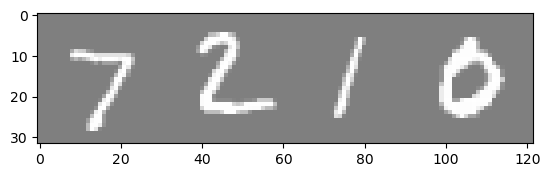

GroundTruth:  7     2     1     0    


In [40]:
#Test the network on the test data
#display an image from the test set to look
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [46]:
accuracy_data = {}  # 用于存储不同神经元数量的准确率

for neuron_count, mlp in mlp_models.items():
    correct = 0
    total = 0
    mlp.eval()  # 测试模式
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = mlp(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / total
    accuracy_data[neuron_count] = accuracy  # 存储准确率
    print(f'Accuracy（{neuron_count} neurons）: {accuracy:.4f}%')


Accuracy（10 neurons）: 96.4700%
Accuracy（20 neurons）: 96.9000%
Accuracy（50 neurons）: 96.6300%
Accuracy（100 neurons）: 96.6400%
Accuracy（200 neurons）: 96.3600%


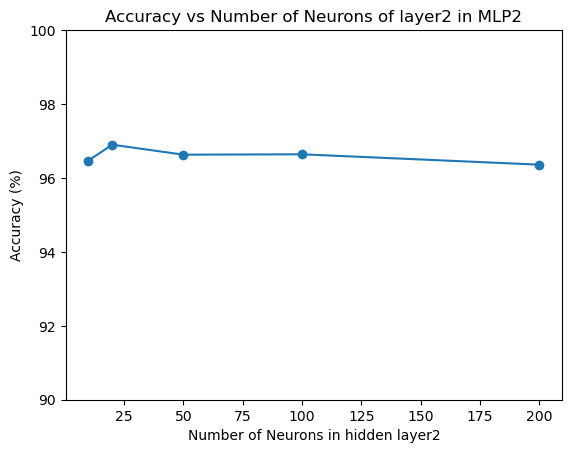

In [52]:
import matplotlib.pyplot as plt

# 提取神经元数量和相应的准确率
neuron_counts = list(accuracy_data.keys())
accuracies = list(accuracy_data.values())

# 绘制柱状图
plt.plot(neuron_counts, accuracies, marker='o')

# 设置图表标题和坐标轴标签
plt.title('Accuracy vs Number of Neurons of layer2 in MLP2')
plt.xlabel('Number of Neurons in hidden layer2')
plt.ylabel('Accuracy (%)')
#限定范围
plt.ylim(90, 100)

# 显示图表
plt.show()


In [42]:
#Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 96 %


In [43]:
# what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = mlp(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 98.0 %
Accuracy for class: 1     is 98.2 %
Accuracy for class: 2     is 95.5 %
Accuracy for class: 3     is 93.7 %
Accuracy for class: 4     is 95.9 %
Accuracy for class: 5     is 97.1 %
Accuracy for class: 6     is 96.9 %
Accuracy for class: 7     is 96.1 %
Accuracy for class: 8     is 97.0 %
Accuracy for class: 9     is 95.1 %


In [54]:
#Using profiler to analyze memory consumption

with profile(activities=[ProfilerActivity.CPU],
        profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"):
        mlp(images)
    
#print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
       model_inference        39.66%     397.000us       100.00%       1.001ms       1.001ms           0 b     -15.78 Kb             1  
          aten::linear         2.00%      20.000us        46.45%     465.000us     155.000us       7.97 Kb           0 b             3  
           aten::addmm        32.97%     330.000us        37.26%     373.000us     124.333us       7.97 Kb       7.97 Kb             3  
            aten::relu         8.39%      84.000us        11.49%     115.000us      57.500us       7.81 Kb           0 b             2  
               aten::t         4.70%     